In [6]:
## load pandas and sqlalchemy's create_engine = database connection
import pandas as pd 
from sqlalchemy import create_engine

In [7]:
# create database engine to manage connections
engine = create_engine("sqlite:///{src_db}".format(src_db=db_file)) # the connection to the database and the server 

In [8]:
# load entire weather table by table name 
weather = pd.read_sql("weather", engine) # remember the query and the engine

In [9]:
print(weather.head())

       station                         name  latitude  longitude  elevation  \
0  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
1  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
2  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
3  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
4  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   

         date     month  awnd  prcp  snow tavg  tmax  tmin  
0  12/01/2017  December  5.37  0.00   0.0         52    42  
1  12/02/2017  December  3.13  0.00   0.0         48    39  
2  12/03/2017  December  2.01  0.00   0.0         48    42  
3  12/04/2017  December  3.58  0.00   0.0         51    40  
4  12/05/2017  December  6.71  0.75   0.0         61    50  


In [10]:
# view the tables within the database
print(engine.table_names())

['boro_census', 'hpd311calls', 'weather']


  print(engine.table_names())


In [11]:
# the function table_names() is being phased out, the current method for doing so is below:
# you must use inspector 
from sqlalchemy import inspect

insp = inspect(engine)

db_table_name = insp.get_table_names()

print(db_table_name)


['boro_census', 'hpd311calls', 'weather']


In [12]:
# Load without SQL 
hpd_calls = pd.read_sql("hpd311calls", engine)

In [13]:
# View the first few rows of data
print(hpd_calls.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough  
0    2786 JEROME AVENUE        07 BRONX      BRONX  
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN  
2  1235 GRAND CONCOURSE        04 BRONX      BRONX  
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN  
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN  


In [14]:
# now load the 2nd table 

# Create a SQL query to load the entire weather table
query = """SELECT * FROM weather;"""

# Load weather with the SQL query
weather_2 = pd.read_sql(query, engine)

In [15]:
# View the first few rows of data
print(weather_2.head())

       station                         name  latitude  longitude  elevation  \
0  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
1  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
2  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
3  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
4  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   

         date     month  awnd  prcp  snow tavg  tmax  tmin  
0  12/01/2017  December  5.37  0.00   0.0         52    42  
1  12/02/2017  December  3.13  0.00   0.0         48    39  
2  12/03/2017  December  2.01  0.00   0.0         48    42  
3  12/04/2017  December  3.58  0.00   0.0         51    40  
4  12/05/2017  December  6.71  0.75   0.0         61    50  


In [16]:
# querying the database
nyc_query = """ SELECT * FROM hpd311calls WHERE borough = 'BROOKLYN'; """ # dont forget to execute your clause with semicolon  

In [17]:
# create a execute variable 
bklyn_calls = pd.read_sql(nyc_query, engine)

In [18]:
print(bklyn_calls.borough.unique()) # print unique vals

['BROOKLYN']


In [19]:
# additional conditions to the query 
and_query = """ SELECT * FROM hpd311calls WHERE borough = 'BRONX' AND complaint_type = 'PLUMBING'; """

In [20]:
bx_plumbing_calls = pd.read_sql(and_query, engine)

In [21]:
# print the record count 
print(bx_plumbing_calls.shape)

(2016, 8)


In [22]:
# REMINDER AND is when all criteria are met and OR is when one is met 
or_query = """ SELECT * FROM hpd311calls WHERE  complaint_type = 'PLUMBING'AND complaint_type = 'WATER LEAK'; """

In [23]:
# new query var
leaks_or_plumbing = pd.read_sql(or_query,engine)

In [24]:
# recheck record count 
print(leaks_or_plumbing.shape)

(0, 8)


In [25]:
# lets reexplore the weater dataset, first dozen results
print(weather.head(12))

        station                         name  latitude  longitude  elevation  \
0   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
1   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
2   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
3   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
4   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
5   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
6   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
7   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
8   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
9   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
10  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
11  USW00094728  NY CITY CENTRAL PARK, N

In [26]:
weather_query = """SELECT date, tmax, tmin FROM weather;"""

In [27]:
# Make a dataframe by passing query and engine to read_sql()
temperatures = pd.read_sql(weather_query,engine)

In [28]:
# View the resulting dataframe
print(temperatures)

           date  tmax  tmin
0    12/01/2017    52    42
1    12/02/2017    48    39
2    12/03/2017    48    42
3    12/04/2017    51    40
4    12/05/2017    61    50
..          ...   ...   ...
116  03/27/2018    47    34
117  03/28/2018    52    38
118  03/29/2018    53    49
119  03/30/2018    62    44
120  03/31/2018    58    39

[121 rows x 3 columns]


In [29]:
# tmin = temp minimum and tmax = temp maximum
temperatures.describe()

,tmax,tmin
count,121.000000,121.000000
mean,43.504132,30.702479
std,11.658419,10.050410
min,13.000000,5.000000
25%,38.000000,25.000000
50%,44.000000,32.000000
75%,51.000000,37.000000
max,78.000000,55.000000


In [30]:
# lets reexplore safety data in NYC

In [31]:
nyc_safety_query = """SELECT * FROM hpd311calls WHERE complaint_type = 'SAFETY';"""

In [32]:
# Query the database and assign result to safety_calls
safety_calls = pd.read_sql(nyc_safety_query,engine)

In [33]:
# to visualize our data, need the matplotlib
from matplotlib import pyplot as plt

<AxesSubplot:ylabel='borough'>

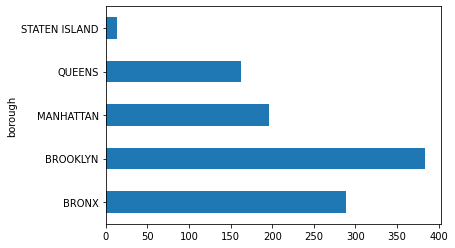

In [34]:
# Graph the number of safety calls by borough
call_counts = safety_calls.groupby('borough').unique_key.count()
call_counts.plot.barh()

In [35]:
# Create query for records with max temps <= 32 or snow >= 1
snow_query = """SELECT * FROM weather WHERE tmax <= 32 OR  snow >= 1;"""

In [36]:
# Query database and assign result to wintry_days
wintry_days = pd.read_sql(query, engine)

In [37]:
# View summary stats about the temperatures
print(wintry_days.describe())

           latitude     longitude  elevation        awnd        prcp  \
count  1.210000e+02  1.210000e+02      121.0  121.000000  121.000000   
mean   4.077898e+01 -7.396925e+01       42.7    6.507603    0.127190   
std    7.134972e-15  1.426994e-14        0.0    2.296867    0.305746   
min    4.077898e+01 -7.396925e+01       42.7    2.010000    0.000000   
25%    4.077898e+01 -7.396925e+01       42.7    4.920000    0.000000   
50%    4.077898e+01 -7.396925e+01       42.7    6.260000    0.000000   
75%    4.077898e+01 -7.396925e+01       42.7    7.830000    0.060000   
max    4.077898e+01 -7.396925e+01       42.7   12.970000    1.860000   

             snow        tmax        tmin  
count  121.000000  121.000000  121.000000  
mean     0.292562   43.504132   30.702479  
std      1.317584   11.658419   10.050410  
min      0.000000   13.000000    5.000000  
25%      0.000000   38.000000   25.000000  
50%      0.000000   44.000000   32.000000  
75%      0.000000   51.000000   37.000000  

In [38]:
# the alternative method for database ingestion 

import sqlite3

In [39]:
connection = sqlite3.connect(db_file)

In [40]:
# create cursor obj to communicate with db 
cursor = connection.cursor()

In [41]:
# execute query to find out info on the tables within the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [42]:
# retrieve all the table names from the SQLite database 
tables= cursor.fetchall()

In [43]:
# loop thru the names 
for table in tables:
    print(table[0])

hpd311calls
weather
boro_census


In [44]:
cursor.execute("SELECT * FROM hpd311calls;")

In [45]:
# the results of the SELECT ALL
tables_2 = cursor.fetchall()

In [46]:
tables_2

[('38070822',
  '01/01/2018',
  'HPD',
  'HEAT/HOT WATER',
  '10468',
  '2786 JEROME AVENUE',
  '07 BRONX',
  'BRONX'),
 ('38065299',
  '01/01/2018',
  'HPD',
  'PLUMBING',
  '10003',
  '323 EAST   12 STREET',
  '03 MANHATTAN',
  'MANHATTAN'),
 ('38066653',
  '01/01/2018',
  'HPD',
  'HEAT/HOT WATER',
  '10452',
  '1235 GRAND CONCOURSE',
  '04 BRONX',
  'BRONX'),
 ('38070264',
  '01/01/2018',
  'HPD',
  'HEAT/HOT WATER',
  '10032',
  '656 WEST  171 STREET',
  '12 MANHATTAN',
  'MANHATTAN'),
 ('38072466',
  '01/01/2018',
  'HPD',
  'HEAT/HOT WATER',
  '11213',
  '1030 PARK PLACE',
  '08 BROOKLYN',
  'BROOKLYN'),
 ('38076151',
  '01/01/2018',
  'HPD',
  'HEAT/HOT WATER',
  '10463',
  '3810 BAILEY AVENUE',
  '08 BRONX',
  'BRONX'),
 ('38074972',
  '01/01/2018',
  'HPD',
  'HEAT/HOT WATER',
  '10468',
  '2554 CRESTON AVENUE',
  '07 BRONX',
  'BRONX'),
 ('38076014',
  '01/01/2018',
  'HPD',
  'HEAT/HOT WATER',
  '11249',
  '70 ROSS STREET',
  '01 BROOKLYN',
  'BROOKLYN'),
 ('38077321',
  '0

In [47]:
# will need to close the connection and commit 